# HW2: KNN and Cross-Validation

First, we'll prepare all the packages and the data.

In [18]:
# Import necessary packages and dataset
%matplotlib inline
from __future__ import division
import pandas as pd
import numpy as np

from seaborn import plt
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets, feature_selection
from sklearn.cross_validation import train_test_split, cross_val_score

iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['Target'] = iris.target

In [3]:
# the values of k in KNN
# we will examine the performance on different k values and explore what value gives the best result
n_neighbors = range(1, 25, 1)
print n_neighbors

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


<b>1. Implement KNN classification, using the sklearn package.</b>

In [11]:
# Create the training (and test) set using scikit-learn's train_test_split function
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=12)

In [12]:
# Loop through each neighbors value from 1 to 51 and append
# the scores
scores = []
for n in n_neighbors:
    clf = neighbors.KNeighborsClassifier(n)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

print scores

[0.97777777777777775, 0.97777777777777775, 0.97777777777777775, 0.97777777777777775, 0.97777777777777775, 1.0, 0.97777777777777775, 1.0, 0.97777777777777775, 0.97777777777777775, 1.0, 0.97777777777777775, 0.97777777777777775, 0.97777777777777775, 0.97777777777777775, 0.97777777777777775, 0.97777777777777775, 0.97777777777777775, 0.97777777777777775, 0.97777777777777775, 0.97777777777777775, 0.9555555555555556, 0.9555555555555556, 0.97777777777777775]


<b>2. Use the sklearn package to implement cross-validation for your classifier. Use 5 folds for your cross-validation.</b>

In [13]:
clf = neighbors.KNeighborsClassifier(11, weights='uniform')
clf.fit(iris.data, iris.target)
clf_scores = cross_val_score(clf, iris_df.values, iris.target, cv=5)

In [34]:
print clf_scores
print clf_scores.mean()

[ 0.93333333  1.          1.          0.96666667  1.        ]
0.98


<b>3. Use your KNN classifier and cross-validation code from (1) and (2) above to determine the optimal value of K (number of nearest neighbors to consult) for this Iris dataset.</b><br>
<i>Hint: This hyperparameter will be a number between 1 and 150 :)</i>

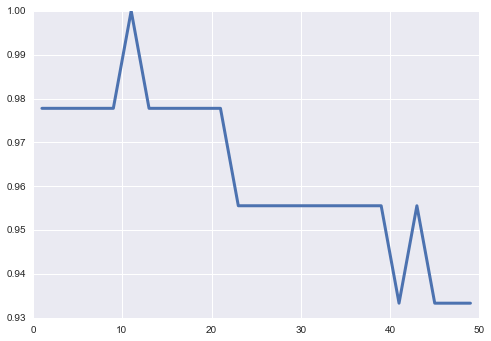

In [29]:
plt.plot(n_neighbors, scores, linewidth=3.0)

Based on the plot above, the optimal K-value (hyperparamter) is 11.

<b>4. Using matplotlib, plot classifier accuracy versus the hyperparameter K for a range of K that you consider interesting. Explain in words what you are seeing.</b>

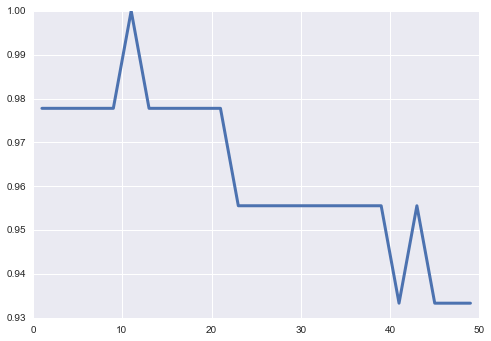

In [25]:
plt.plot(n_neighbors, scores, linewidth=3.0)

Here, we see that, past a certain point, classifier accuracy becomes less and less accurate past the optimal point, which is indicative of overfitting a model to a dataset.

<b>5. Now, write your own implementation of cross-validation in Python without using the cross-validation methods from sklearn. Cross-validation is a very important concept. Implementing it yourself in Python is the best way to learn and understand it. Compare the results of your cross-validation code with your results using the cross-validation in sklearn.</b>

Let's start by creating the different partitions. For this example, we'll use five partitions.

In [45]:
# Set the reference points of each DataFrame partition
num_partitions = 5
len_partition_1 = int(len(iris_df) / num_partitions)
len_partition_2 = 2 * (len_partition_1)
len_partition_3 = 3 * (len_partition_1)
len_partition_4 = 4 * (len_partition_1)
len_partition_5 = 5 * (len_partition_1)

# Create the partitions using the reference points above
iris_df_1 = iris_df[0:len_partition_1]
iris_df_2 = iris_df[len_partition_1:len_partition_2]
iris_df_3 = iris_df[len_partition_2:len_partition_3]
iris_df_4 = iris_df[len_partition_3:len_partition_4]
iris_df_5 = iris_df[len_partition_4:len_partition_5]

iris_partitions = [iris_df_1,
                   iris_df_2,
                   iris_df_3,
                   iris_df_4,
                   iris_df_5]

new_clf = neighbors.KNeighborsClassifier(11, weights='uniform')

<b>6. EXTRA CREDIT 1: Using the value of K obtained in (3) above, vary the number of folds used for cross-validation across an interesting range, e.g. [ 2, 3, 5, 6, 10, 15]. How does classifier accuracy vary with the number of folds used? Do you think there exists an optimal number of folds to use for this particular problem? Why or why not?</b>

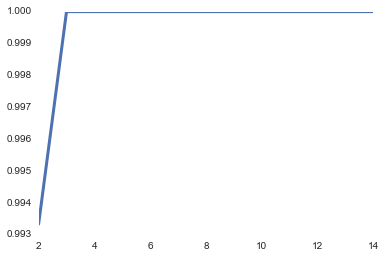

In [44]:
ec_range = range(2, 15, 1)
ec_scores = []

ec_clf = neighbors.KNeighborsClassifier(11, weights='uniform')
ec_clf.fit(iris.data, iris.target)

for num in ec_range:
  ec_scores.append(cross_val_score(ec_clf, iris_df.values, iris.target, cv=num).mean())

plt.plot(ec_range, ec_scores, linewidth=3.0)

Assuming I did the above example correctly, It looks like accuracy plateaus at >2 folds until we reach 15.

<b>7. EXTRA CREDIT 2: Write your own implementation of KNN classification in Python, without using the methods from sklearn. Compare your results with the results you obtained using sklearn.</b>